In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('housing_prices_cleaned.csv')
data['price_per_sqft'] = (data['price']/data['area']).round(2)
data.head()

,locality_name,region_name,price,area,construction_status,house_type,bhk,new_resale,age,price_per_sqft
0,Tarwala Nagar,Nashik,8499000.0,2260.0,Under Construction,Apartment,4.0,New,-1.0,3760.62
1,Dombivali,Mumbai,6790000.0,500.0,Under Construction,Apartment,2.0,New,0.0,13580.00
2,Wagholi,Pune,6030000.0,773.0,Under Construction,Apartment,3.0,New,-3.0,7800.78
3,Ambegaon Budruk,Pune,3537000.0,477.0,Ready to move,Apartment,1.0,New,0.5,7415.09
4,Dombivali,Mumbai,9500000.0,917.0,Under Construction,Apartment,3.0,New,-3.0,10359.87


<h2>Finding top 10 cities by number of properties</h2>

In [3]:
top_cities_props = data['region_name'].value_counts().nlargest(10)

In [4]:
top_cities_props

Mumbai        82525
Pune          33881
Nagpur         1885
Nashik          581
Raigad          494
Aurangabad      106
Kolhapur         56
Satara           41
Amravati         38
Sangli           33
Name: region_name, dtype: int64

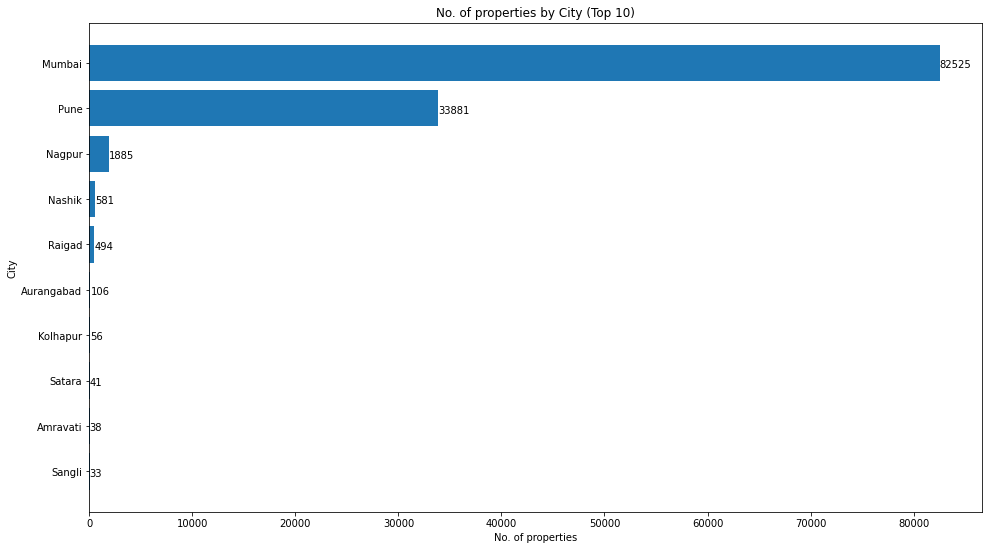

In [5]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(top_cities_props.index, top_cities_props.values)
ax.invert_yaxis()
ax.set_title('No. of properties by City (Top 10)')
ax.set_xlabel('No. of properties')
ax.set_ylabel('City')
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.5, str(round((i.get_width()), 2)))
plt.show()

<h2>Finding top 10 expensive cities</h2>

In [6]:
top_cities = data.groupby(['region_name'])['price_per_sqft'].mean().sort_values(ascending=False).nlargest(10).round(2)

In [7]:
top_cities

region_name
Mumbai        14505.83
Pune           7470.08
Alibaugh       7242.76
Nanded         5918.55
Raigad         5385.15
Solapur        4858.05
Kolhapur       4814.64
Hingoli        4630.81
Aurangabad     4554.38
Ahmednagar     4539.35
Name: price_per_sqft, dtype: float64

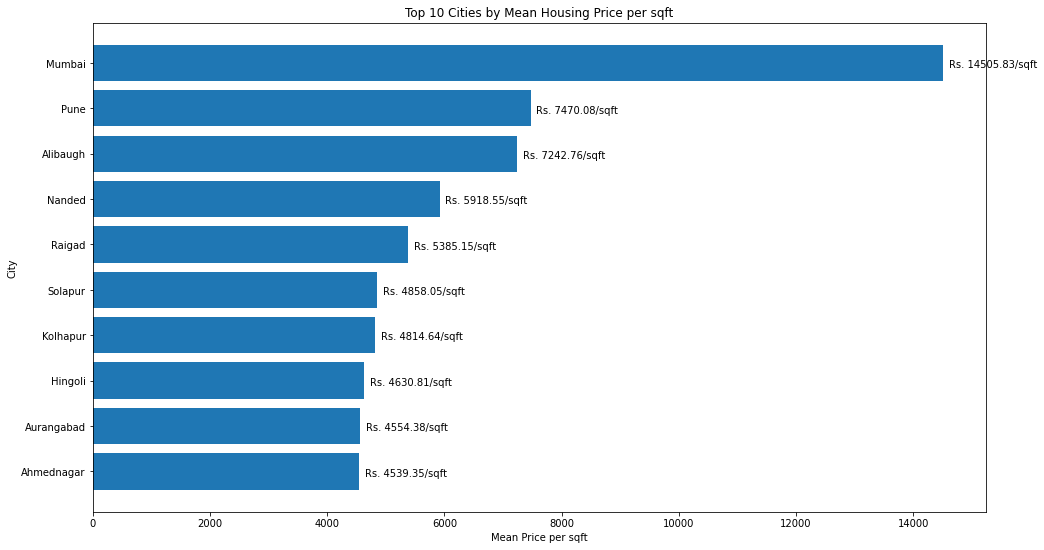

In [8]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(top_cities.index, top_cities.values)
ax.invert_yaxis()
ax.set_title('Top 10 Cities by Mean Housing Price per sqft')
ax.set_xlabel('Mean Price per sqft')
ax.set_ylabel('City')
for i in ax.patches:
    plt.text(i.get_width()+100, i.get_y()+0.5, "Rs. "+str(round((i.get_width()), 2))+"/sqft")
plt.show()

<h2>Analysis for a given city</h2>

In [9]:
#Select city
city = 'Mumbai'

In [10]:
localities = data[data['region_name']==city]
top_localities = localities.groupby(['locality_name'])['price_per_sqft'].mean().sort_values(ascending=False).nlargest(10).round(2)

In [11]:
top_localities

locality_name
Marine Drive           109443.54
Churchgate              97965.49
Banganga Cross Lane     96666.67
Kemps Corner            78043.73
Juhu Tara Rd            73232.32
Marine Lines            72524.26
juhu tara               70550.92
Walkeshwar              66415.87
Colaba                  61175.54
Cumballa Hill           59239.21
Name: price_per_sqft, dtype: float64

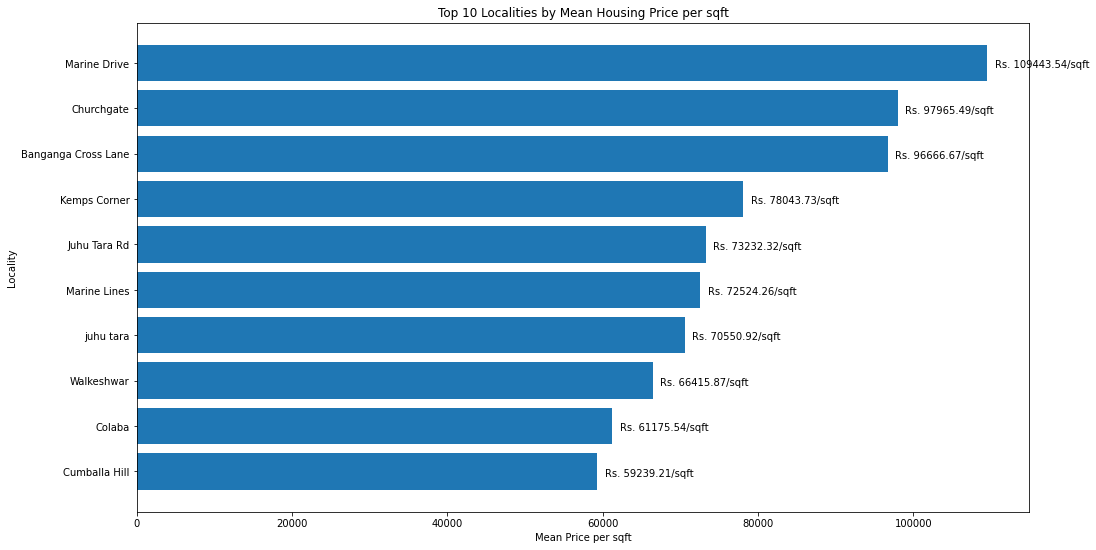

In [12]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(top_localities.index, top_localities.values)
ax.invert_yaxis()
ax.set_title('Top 10 Localities by Mean Housing Price per sqft')
ax.set_xlabel('Mean Price per sqft')
ax.set_ylabel('Locality')
for i in ax.patches:
    plt.text(i.get_width()+1000, i.get_y()+0.5, "Rs. "+str(round((i.get_width()), 2))+"/sqft")
plt.show()

In [13]:
bottom_localities = localities.groupby(['locality_name'])['price_per_sqft'].mean().sort_values(ascending=True).nsmallest(10).round(2)

In [14]:
bottom_localities

locality_name
Thane commissioner office    1120.00
Vikramgad                    1294.12
Sector10 New Panvel East     1309.09
Kelve                        1750.00
Sector-35 Kamothe            1785.71
Bhopar Goan                  1960.78
Kelwa                        2175.89
Kalyan Railway Yard          2181.82
Tembhode                     2561.67
Housing Board Colony         2575.76
Name: price_per_sqft, dtype: float64

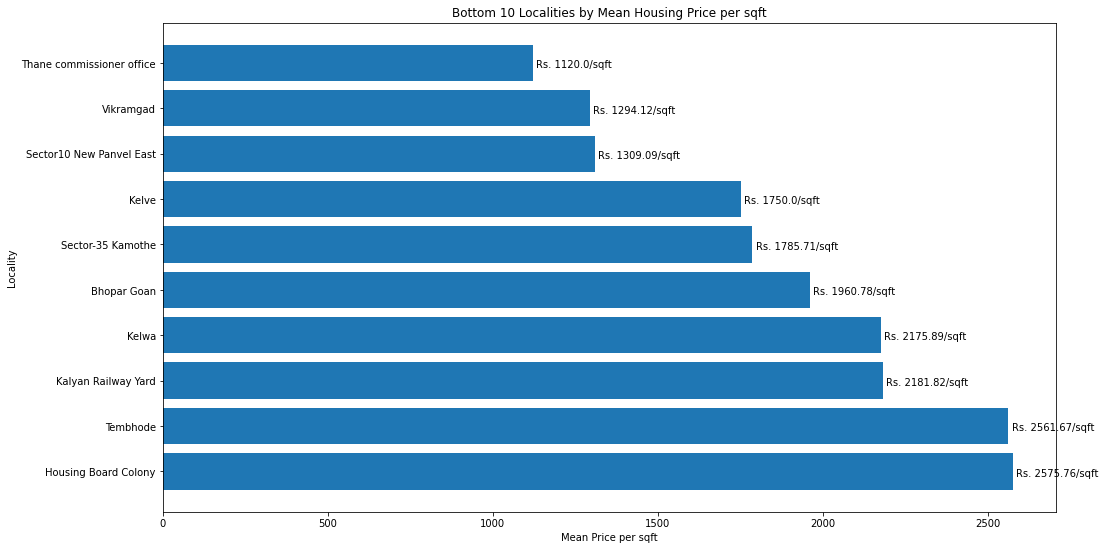

In [15]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(bottom_localities.index, bottom_localities.values)
ax.invert_yaxis()
ax.set_title('Bottom 10 Localities by Mean Housing Price per sqft')
ax.set_xlabel('Mean Price per sqft')
ax.set_ylabel('Locality')
for i in ax.patches:
    plt.text(i.get_width()+10, i.get_y()+0.5, "Rs. "+str(round((i.get_width()), 2))+"/sqft")
plt.show()

<h2>Number of bedrooms</h2>

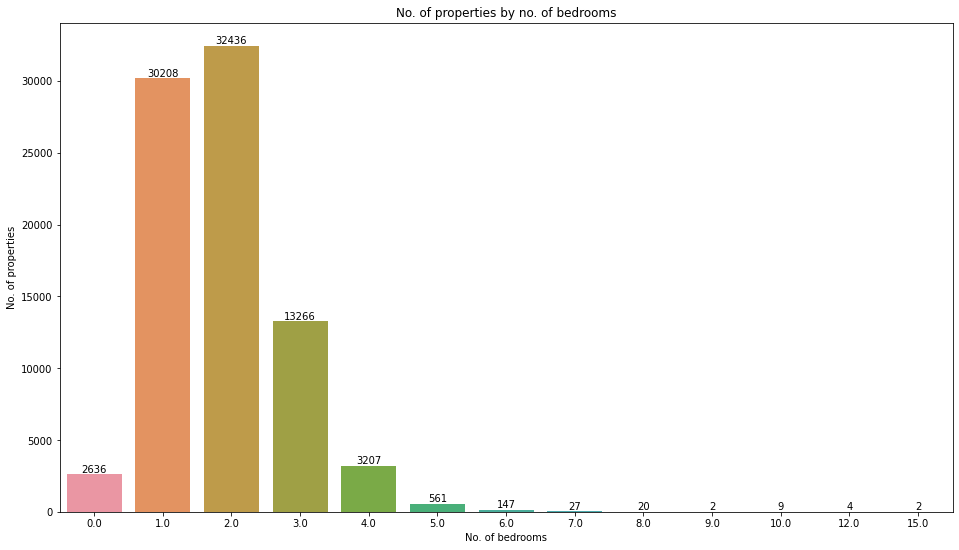

In [16]:
fig, ax = plt.subplots(figsize =(16, 9))
sns.countplot(x='bhk', data=localities)
ax.set_title('No. of properties by no. of bedrooms')
ax.set_xlabel('No. of bedrooms')
ax.set_ylabel('No. of properties')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

<h2>Constuction status by size of house</h2>

In [17]:
cs = localities.groupby(['construction_status', 'bhk']).size().reset_index().pivot(
    columns='construction_status', index='bhk', values=0)

In [18]:
cs

construction_status,Ready to move,Under Construction
bhk,,
0.0,2100.0,536.0
1.0,18692.0,11516.0
2.0,20439.0,11997.0
3.0,8872.0,4394.0
4.0,2345.0,862.0
5.0,442.0,119.0
6.0,106.0,41.0
7.0,21.0,6.0
8.0,16.0,4.0


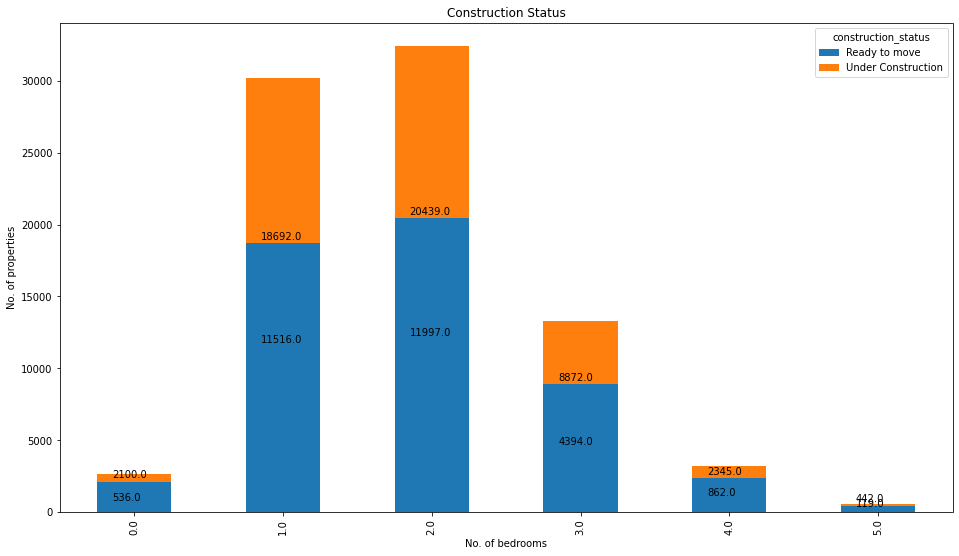

In [19]:
ax = cs.iloc[:6,:].plot.bar(align='center', stacked=True, figsize=(16, 9))
ax.set_title('Construction Status')
ax.set_xlabel('No. of bedrooms')
ax.set_ylabel('No. of properties')
for i in ax.patches:
    plt.text(i.get_x()+0.1,i.get_height()+500,str(i.get_height()),verticalalignment='center')
plt.show()

<h2>Price vs Area for Top 10 Localities in City by Price</h2>

In [20]:
top_localities_df = localities[localities['locality_name'].isin(top_localities.index.values)]

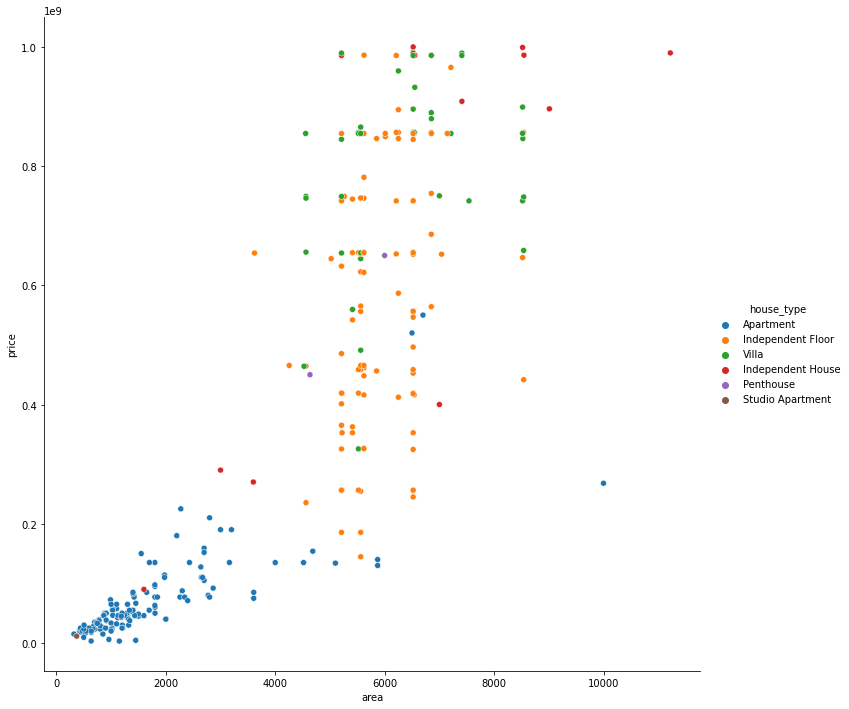

In [21]:
sns.pairplot(x_vars=['area'], y_vars=['price'], data=top_localities_df, hue="house_type", height=10)

<p>Apartments have the smallest area and lowest price ie. less than 4000sqft and less than Rs. 20 crore.</p>
<p>Independent floor houses are in the range of 5000 to 7000 sqft area and Rs. 20 to 100 crore price.</p>
<p>Villas are in the range of 4000 to 9000 sqft area and Rs. 40 to 100 crore price.</p>